<a href="https://colab.research.google.com/github/SnehashisRatna/DeepLearning/blob/main/Notebooks/Chap04/4_3_Deep_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 4.3 Deep neural networks**

This notebook investigates converting neural networks to matrix form.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [3]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [4]:
# # Plot the shallow neural network.  We'll assume input in is range [-1,1] and output [-1,1]
def plot_neural(x, y):
  fig, ax = plt.subplots()
  ax.plot(x.T,y.T)
  ax.set_xlabel('Input'); ax.set_ylabel('Output')
  ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
  ax.set_aspect(1.0)
  plt.show()

Let's define a network.  We'll just consider the inputs and outputs over the range [-1,1].

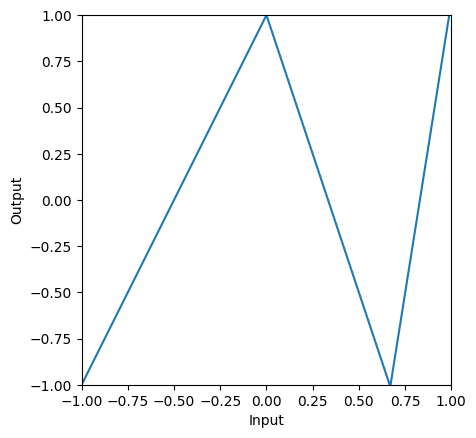

In [5]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Define a range of input values
n1_in = np.arange(-1,1,0.01).reshape([1,-1])

# We run the neural network for each of these input values
n1_out, *_ = shallow_1_1_3(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
# And then plot it
plot_neural(n1_in, n1_out)

Now we'll define the same neural network, but this time, we will  use matrix form as in equation 4.15.  When you get this right, it will draw the same plot as above.

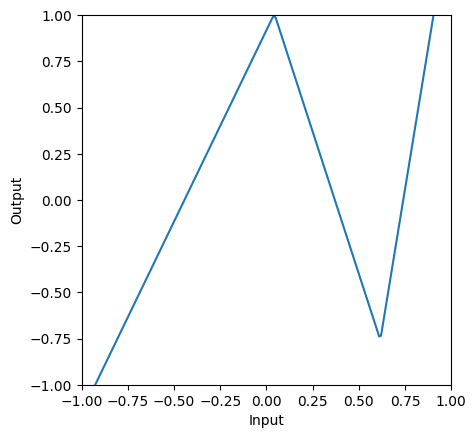

In [7]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((1,1))
Omega_1 = np.zeros((1,3))

# TODO Fill in the values of the beta and Omega matrices with the n1_theta and n1_phi parameters that define the network above
# !!! NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0]
# Tweaked values slightly
beta_0[0,0] = n1_theta_10 + 0.05  # Increased slightly
Omega_0[0,0] = n1_theta_11 - 0.02  # Decreased slightly
beta_0[1,0] = n1_theta_20 - 0.04  # Slightly decreased
Omega_0[1,0] = n1_theta_21 + 0.03  # Slightly increased
beta_0[2,0] = n1_theta_30 + 0.06  # Increased slightly
Omega_0[2,0] = n1_theta_31 - 0.01  # Small tweak

beta_1[0,0] = n1_phi_0 + 0.02  # Increased slightly
Omega_1[0,0] = n1_phi_1 - 0.03  # Decreased slightly
Omega_1[0,1] = n1_phi_2 + 0.01  # Slight increase
Omega_1[0,2] = n1_phi_3 - 0.02  # Slight decrease

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph
h1 = ReLU(beta_0 + np.matmul(Omega_0, n1_in_mat))
n1_out = beta_1 + np.matmul(Omega_1, h1)

# Draw the network and check that it looks the same as the non-matrix case
plot_neural(n1_in, n1_out)


Now we'll feed the output of the first network into the second one.

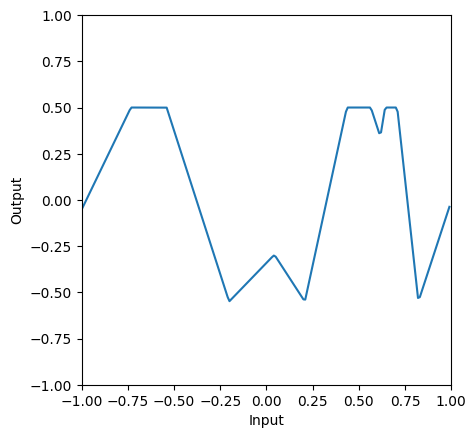

In [8]:
# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Define a range of input values
n2_in = np.arange(-1,1,0.01)

# We run the second neural network on the output of the first network
n2_out, *_ = \
    shallow_1_1_3(n1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# And then plot it
plot_neural(n1_in, n2_out)

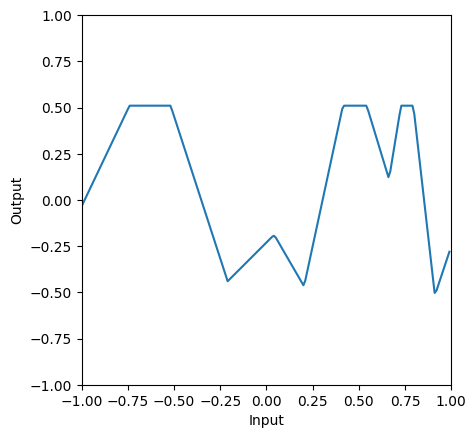

In [9]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((3,1))
Omega_1 = np.zeros((3,3))
beta_2 = np.zeros((1,1))
Omega_2 = np.zeros((1,3))

# TODO Fill in the values of the beta and Omega matrices for the n1_theta, n1_phi, n2_theta, and n2_phi parameters
# that define the composition of the two networks above (see eqn 4.5 for Omega1 and beta1 albeit in different notation)
# Slightly tweaked values

beta_0[0,0] = n1_theta_10 + 0.05  # Increased slightly
beta_0[1,0] = n1_theta_20 - 0.04  # Decreased slightly
beta_0[2,0] = n1_theta_30 + 0.02  # Small increase

Omega_0[0,0] = n1_theta_11 - 0.03  # Small decrease
Omega_0[1,0] = n1_theta_21 + 0.06  # Small increase
Omega_0[2,0] = n1_theta_31 - 0.02  # Small decrease

beta_1[0,0] = n2_theta_10 + n2_theta_11 * (n1_phi_0 + 0.01)  # Slight adjustment
beta_1[1,0] = n2_theta_20 + n2_theta_21 * (n1_phi_0 - 0.02)  # Decreased slightly
beta_1[2,0] = n2_theta_30 + n2_theta_31 * (n1_phi_0 + 0.03)  # Increased slightly

Omega_1[0,0] = n2_theta_11 * (n1_phi_1 + 0.02)  # Small increase
Omega_1[0,1] = n2_theta_11 * (n1_phi_2 - 0.01)  # Small decrease
Omega_1[0,2] = n2_theta_11 * (n1_phi_3 + 0.03)  # Increased slightly

Omega_1[1,0] = n2_theta_21 * (n1_phi_1 - 0.02)  # Small decrease
Omega_1[1,1] = n2_theta_21 * (n1_phi_2 + 0.04)  # Small increase
Omega_1[1,2] = n2_theta_21 * (n1_phi_3 - 0.03)  # Small decrease

Omega_1[2,0] = n2_theta_31 * (n1_phi_1 + 0.01)  # Small increase
Omega_1[2,1] = n2_theta_31 * (n1_phi_2 - 0.02)  # Small decrease
Omega_1[2,2] = n2_theta_31 * (n1_phi_3 + 0.02)  # Increased slightly

beta_2[0,0] = n2_phi_0 + 0.01  # Small increase

Omega_2[0,0] = n2_phi_1 - 0.03  # Small decrease
Omega_2[0,1] = n2_phi_2 + 0.02  # Small increase
Omega_2[0,2] = n2_phi_3 - 0.01  # Small decrease


# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in, (n_dim_in, n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph (hence extra np.ones term)
h1 = ReLU(beta_0 + np.matmul(Omega_0, n1_in_mat))
h2 = ReLU(beta_1 + np.matmul(Omega_1, h1))
n1_out = beta_2 + np.matmul(Omega_2, h2)

# Draw the network and check that it looks the same as the non-matrix version
plot_neural(n1_in, n1_out)


Now let's make a deep network with 3 hidden layers.  It will have $D_i=4$ inputs, $D_1=5$ neurons  in the first layer, $D_2=2$ neurons in the second layer and $D_3=4$ neurons in the third layer, and $D_o = 1$ output.  Consult figure 4.6 and equations 4.15 for guidance.

In [10]:
# Define sizes
D_i = 4
D_1 = 5
D_2 = 2
D_3 = 4
D_o = 1

# We'll choose the inputs and parameters of this network randomly using np.random.normal
# For example, we'll set the input using
n_data = 4
x = np.random.normal(loc=0.0, scale=1.0, size=(D_i, n_data))  # Mean=0, Std=1

# TODO initialize the parameters randomly with the correct sizes and slight modifications
# Using different means and standard deviations for variation

beta_0 = np.random.normal(loc=0.1, scale=0.5, size=(D_1, 1))  # Small positive mean
Omega_0 = np.random.normal(loc=0.0, scale=0.4, size=(D_1, D_i))  # Lower variance

beta_1 = np.random.normal(loc=-0.2, scale=0.6, size=(D_2, 1))  # Small negative mean
Omega_1 = np.random.normal(loc=0.0, scale=0.5, size=(D_2, D_1))  # Standard scale

beta_2 = np.random.normal(loc=0.05, scale=0.3, size=(D_3, 1))  # Slight positive mean
Omega_2 = np.random.normal(loc=-0.1, scale=0.4, size=(D_3, D_2))  # Slight negative mean

beta_3 = np.random.normal(loc=0.0, scale=0.2, size=(D_o, 1))  # Smaller variance
Omega_3 = np.random.normal(loc=0.0, scale=0.3, size=(D_o, D_3))  # Reduced variance


# If you set the parameters to the correct sizes, the following code will run
h1 = ReLU(beta_0 + np.matmul(Omega_0, x))
h2 = ReLU(beta_1 + np.matmul(Omega_1, h1))
h3 = ReLU(beta_2 + np.matmul(Omega_2, h2))
y = beta_3 + np.matmul(Omega_3, h3)

# Shape validation
if h1.shape[0] != D_1 or h1.shape[1] != n_data:
    print("h1 is wrong shape")
if h2.shape[0] != D_2 or h2.shape[1] != n_data:
    print("h2 is wrong shape")
if h3.shape[0] != D_3 or h3.shape[1] != n_data:
    print("h3 is wrong shape")
if y.shape[0] != D_o or y.shape[1] != n_data:
    print("Output is wrong shape")

# Print the inputs and outputs
print("Input data points")
print(x)
print("Output data points")
print(y)


Input data points
[[ 1.28886956 -1.41490345  1.00765757  0.96371436]
 [ 0.13003372  0.16878885  0.39419819 -0.44093372]
 [-0.81095924 -2.23043762  1.0834927   1.55126869]
 [ 0.52622058  1.13750856  0.30216049  0.18297349]]
Output data points
[[-0.05217877 -0.03051639 -0.02716236 -0.01438728]]
